In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [3]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [4]:
np.random.seed(42)

In [5]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    # Sign Curve 1
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    # Sign Curve 2
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    # Noise
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

In [6]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [7]:
x_train.shape, x_valid.shape, x_test.shape

((7000, 50, 1), (2000, 50, 1), (1000, 50, 1))

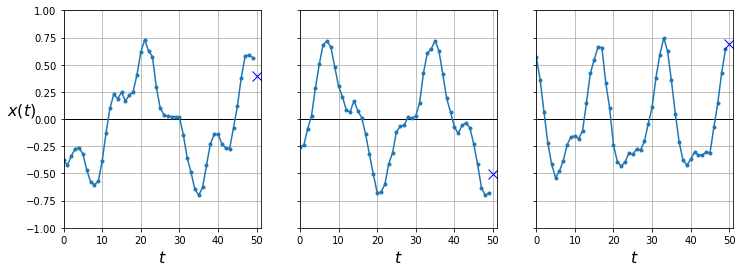

In [8]:
def plot_series(series, y=None, y_pred=None, x_label='$t$', y_label='$x(t)$'):
    plt.plot(series,'.-')
    if y is not None:
        plt.plot(n_steps, y, 'bx', markersize = 10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, 'ro')
    plt.grid(True)
    
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    
    plt.hlines(0, 0, 100, lw = 1)
    plt.axis([0, n_steps + 1, -1, 1])
    
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0], y_label = ('$x(t)$' if col ==0 else None))
plt.show()


In [9]:
y_pred = x_valid[:, -1]

In [10]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

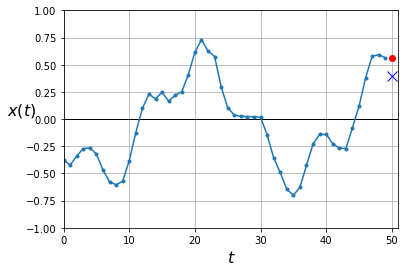

In [11]:
plot_series(x_valid[0, : , 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [13]:
model.compile(loss = 'mse',
             optimizer ='adam')

In [14]:
history = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 90us/sample - loss: 0.1845 - val_loss: 0.0672
Epoch 2/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0474 - val_loss: 0.0354
Epoch 3/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0279 - val_loss: 0.0230
Epoch 4/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.0194 - val_loss: 0.0173
Epoch 5/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0153 - val_loss: 0.0143
Epoch 6/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.0130 - val_loss: 0.0125
Epoch 7/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.0115 - val_loss: 0.0112
Epoch 8/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.0103 - val_loss: 0.0100
Epoch 9/20
7000/7000 [==============================] - 0s 42us/sample - loss: 0.0093 - val_loss: 0.0091
Epoch 1

In [15]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 25us/sample - loss: 0.0048


0.004811276901513338

In [16]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, 'b.-', label = 'Training loss')
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, 'r.-', label = 'Validation loss')
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0 , 0.05])
    plt.legend(fontsize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()

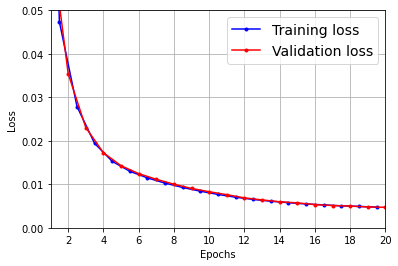

In [17]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])
plt.show()

## Simple RNN

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [19]:
model.compile(loss = 'mse',
             optimizer ='adam')

In [20]:
history2 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 550us/sample - loss: 0.0252 - val_loss: 0.0190
Epoch 2/20
7000/7000 [==============================] - 3s 469us/sample - loss: 0.0154 - val_loss: 0.0131
Epoch 3/20
7000/7000 [==============================] - 3s 465us/sample - loss: 0.0122 - val_loss: 0.0113
Epoch 4/20
7000/7000 [==============================] - 3s 467us/sample - loss: 0.0115 - val_loss: 0.0110
Epoch 5/20
7000/7000 [==============================] - 3s 477us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 6/20
7000/7000 [==============================] - 3s 475us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 7/20
7000/7000 [==============================] - 3s 476us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
7000/7000 [==============================] - 3s 478us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
7000/7000 [==============================] - 3s 462us/sample - loss: 0.0114 - val_loss: 0.010

In [21]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 102us/sample - loss: 0.0113


0.0112582718282938

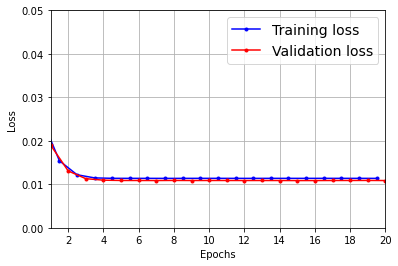

In [22]:
plot_learning_curves(history2.history['loss'], history2.history['val_loss'])
plt.show()

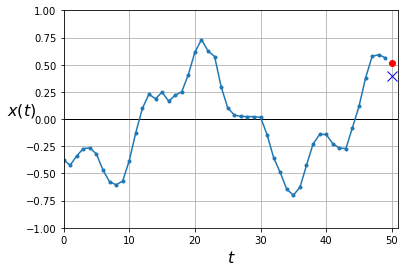

In [23]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Deep RNN

In [24]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [26]:
model.compile(loss = 'mse', optimizer ='adam')

In [27]:
history3 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0549 - val_loss: 0.0084
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0068 - val_loss: 0.0051
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0051 - val_loss: 0.0050
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0047 - val_loss: 0.0040
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0042 - val_loss: 0.0038
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0040 - val_loss: 0.0038
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0037 - val_loss: 0.0038
Epoch 8/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0035 - val_loss: 0.0037
Epoch 9/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0034 - val_loss: 0.0031
Epoch 10/

In [28]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 259us/sample - loss: 0.0030


0.003034699682146311

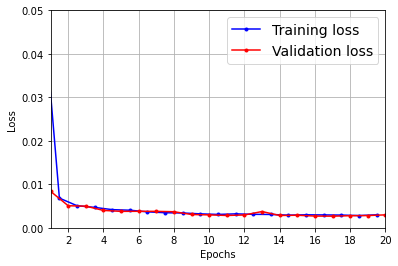

In [29]:
plot_learning_curves(history3.history['loss'], history3.history['val_loss'])
plt.show()

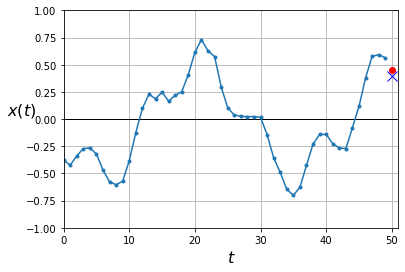

In [30]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [36]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss = 'mse', optimizer ='adam')


In [37]:
history4 = model.fit(x_train, y_train, epochs = 20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0317 - val_loss: 0.0061
Epoch 2/20
7000/7000 [==============================] - 7s 940us/sample - loss: 0.0049 - val_loss: 0.0042
Epoch 3/20
7000/7000 [==============================] - 7s 930us/sample - loss: 0.0038 - val_loss: 0.0034
Epoch 4/20
7000/7000 [==============================] - 7s 929us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 5/20
7000/7000 [==============================] - 6s 911us/sample - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
7000/7000 [==============================] - 7s 941us/sample - loss: 0.0034 - val_loss: 0.0031
Epoch 7/20
7000/7000 [==============================] - 7s 939us/sample - loss: 0.0034 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 7s 943us/sample - loss: 0.0033 - val_loss: 0.0035
Epoch 9/20
7000/7000 [==============================] - 7s 935us/sample - loss: 0.0032 - val_loss: 0.0030


In [38]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 182us/sample - loss: 0.0029


0.002899044394493103

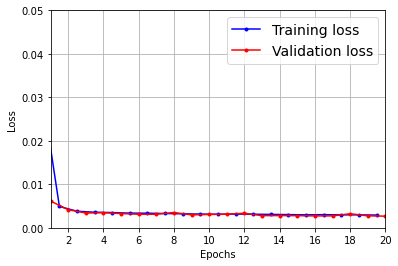

In [39]:
plot_learning_curves(history4.history['loss'], history4.history['val_loss'])
plt.show()

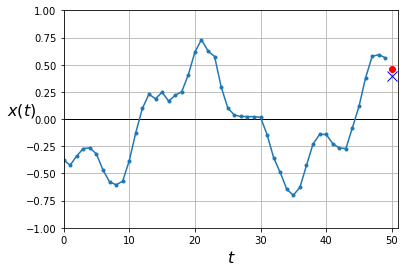

In [40]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, : ,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [45]:
np.random.seed(43)   # 처음 훈련세트 시드를 42를 주었기 때문에 43를 줌
series = generate_time_series(1, n_steps + 10)
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)

y_pred = x[:, n_steps:]

In [46]:
y_pred.shape

(1, 10, 1)

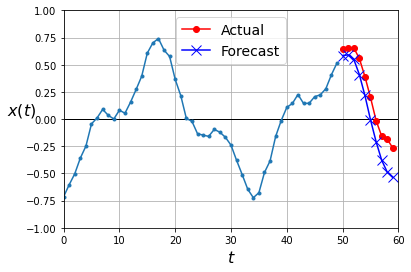

In [47]:
def plot_multiple_forecasts(x, y, y_pred):
    n_steps = x.shape[1]
    ahead = y.shape[1]
    plot_series(x[0, : ,0])
    plt.plot(np.arange(n_steps, n_steps + ahead), y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(x_new, y_new, y_pred)
plt.show()

In [68]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps +10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [70]:
x = x_valid
for step_ahead in range(10):
    y_pred_one = model.predict(x)[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
y_preds = X[:, n_steps:, 0]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 10

In [61]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [62]:
model.compile(loss = keras.losses.mean_squared_error,
             optimizer = keras.optimizers.Adam())

In [63]:
history5 = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0621 - val_loss: 0.0324
Epoch 2/20
7000/7000 [==============================] - 6s 923us/sample - loss: 0.0262 - val_loss: 0.0200
Epoch 3/20
7000/7000 [==============================] - 6s 923us/sample - loss: 0.0172 - val_loss: 0.0142
Epoch 4/20
7000/7000 [==============================] - 6s 926us/sample - loss: 0.0133 - val_loss: 0.0132
Epoch 5/20
7000/7000 [==============================] - 6s 901us/sample - loss: 0.0123 - val_loss: 0.0125
Epoch 6/20
7000/7000 [==============================] - 6s 929us/sample - loss: 0.0117 - val_loss: 0.0103
Epoch 7/20
7000/7000 [==============================] - 6s 921us/sample - loss: 0.0108 - val_loss: 0.0112
Epoch 8/20
7000/7000 [==============================] - 6s 908us/sample - loss: 0.0108 - val_loss: 0.0103
Epoch 9/20
7000/7000 [==============================] - 6s 911us/sample - loss: 0.0098 - val_loss: 0.0091


In [64]:
y_pred = model.predict(x_new)

In [65]:
y_pred

array([[ 0.5845814 ,  0.57845306,  0.530313  ,  0.44284838,  0.3548714 ,
         0.26743466,  0.17534964,  0.08861729,  0.00952394, -0.0448724 ]],
      dtype=float32)

In [66]:
np.mean(keras.metrics.mean_squared_error(y_valid, y_pred))

0.2836631

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 10